**Note:** We let the publisher run for 5 mins and collect 400 rows of data. This is not the complete dataset but it's enough to get visulization to the data.

In [71]:
import boto3
import pandas as pd
from matplotlib import pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

#after running the code portion above run the code below with your own dataset

dataset = "carDataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

df = pd.read_csv(dataset_url)
print('here')
df.rename(columns = {'emission':'vehicle_CO2'})
df


here


,car,vehicle_co2,__dt
0,0,5843.88,2022-04-20 00:00:00.000
1,1,0.00,2022-04-20 00:00:00.000
2,0,7523.47,2022-04-20 00:00:00.000
3,3,8761.14,2022-04-20 00:00:00.000
4,4,9000.72,2022-04-20 00:00:00.000
...,...,...,...
167,1,0.00,2022-04-20 00:00:00.000
168,0,5150.96,2022-04-20 00:00:00.000
169,3,2760.53,2022-04-20 00:00:00.000
170,3,0.00,2022-04-20 00:00:00.000


## Max CO2 Emission Per Vehicle
- let the terminal run, collect x number of rows. Identify the max emission in this time frame
- monitor emision for CO2, track the max CO2. identify any car that is emitting more

Vehicle 0 max CO2 emission: 9975.05
Vehicle 1 max CO2 emission: 9460.68
Vehicle 2 max CO2 emission: 11307.68
Vehicle 3 max CO2 emission: 9337.84
Vehicle 4 max CO2 emission: 15216.78


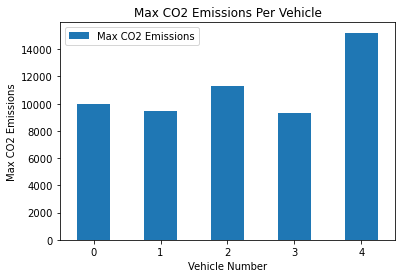

In [73]:
import matplotlib.pyplot as plt
import numpy as np
#df = pd.read_csv('./vehicle_data.csv')
max_CO2_0 = max(df.loc[df['car'] == 0]['vehicle_co2'])
max_CO2_1 = max(df.loc[df['car'] == 1]['vehicle_co2'])
max_CO2_2 = max(df.loc[df['car'] == 2]['vehicle_co2'])
max_CO2_3 = max(df.loc[df['car'] == 3]['vehicle_co2'])
max_CO2_4 = max(df.loc[df['car'] == 4]['vehicle_co2'])

y = [max_CO2_0,max_CO2_1,max_CO2_2,max_CO2_3,max_CO2_4 ]
max_num_df = pd.DataFrame({'Vehicle Number':['0', '1', '2','3','4'], 'Max CO2 Emissions':[max_CO2_0,max_CO2_1,max_CO2_2,max_CO2_3,max_CO2_4 ]})
ax = max_num_df.plot.bar(x='Vehicle Number', y='Max CO2 Emissions', rot=0)
ax.set_ylabel('Max CO2 Emissions')
ax.set_title('Max CO2 Emissions Per Vehicle')

for i in range(5):
    print('Vehicle {} max CO2 emission: {}'.format(str(i),y[i]))



## Max CO2 emissions over time
- Get the running maximum CO2 emission for each vehicle over time
### Observations
    - Vehicle 4 has the largest max CO2 emissions level over time
    - By looking at this data, we can see the upper boundaries for the maximum CO2 emission for each vehicle and maximum emission over multiple timesteps. We can see when is the maximum boundaries increasing and when it stays the same.

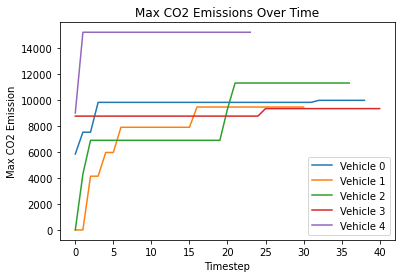

In [74]:
#df = pd.read_csv('./vehicle_data.csv')

for i in range(5):
    cur_emission = df.loc[df['car'] == i]['vehicle_co2']
    s = pd.Series(cur_emission)
    cur_emission = s.cummax().values.tolist()
    plt.plot(np.arange(len(cur_emission)),cur_emission , label = "Vehicle {}".format(i))
plt.xlabel('Timestep')
plt.ylabel('Max CO2 Emission')
plt.title('Max CO2 Emissions Over Time')
plt.legend()
plt.show()
